In [22]:
import matplotlib.pyplot as plt
import numpy as np
import mne
import pandas as pd
import os
from src.UnicornData import UnicornData

In [23]:
data_path = '../../data/bundle_pricing'
data_file = 'bundle_pricing_4_ana'
os.listdir(data_path)

['bundle_pricing_1_nika.csv',
 'bundle_pricing_4_ana.xdf',
 'bundle_pricing_2_dato.csv',
 'bundle_pricing_5_saata.xdf',
 'bundle_pricing_3_beqa.csv',
 'bundle_pricing_4_ana.csv',
 'bundle_pricing_2_dato.xdf',
 'bundle_pricing_5_saata.csv',
 'bundle_pricing_3_beqa.xdf']

In [24]:
csv_data = pd.read_csv(f'{data_path}/{data_file}.csv', skiprows=1, skipfooter=6, engine='python')
csv_data

,timestamp_iso,participant_id,age,response_group,trial_index,block,bundle_id,focal_product,tiein_product,condition,focal_price,tiein_price,total_price,allocation_per_trial,response_key,response,rt_ms,valid_response,is_selected_bundle,bundles_bought_cumulative
0,2026-01-15T08:11:18.557,4,26,B,0,1,14,Sausage (780g),Mustard,NP,11.60,1.4,13.00,70.0,num_1,NOBUY,3567.17,1,0,0
1,2026-01-15T08:11:26.351,4,26,B,1,1,37,FAIRY Dishwashing Liquid Lemon 1.5L,Dishwashing Sponge VILEDA,ZP,11.04,0.0,11.04,70.0,num_1,NOBUY,2706.20,1,0,0
2,2026-01-15T08:11:34.093,4,26,B,2,1,3,Hoco J87 Tacker PD20W+QC3.0 Power Bank (10000m...,Hoco X86 Micro Spear silicone charging data ca...,ZP,46.40,0.0,46.40,70.0,num_3,BUY,1247.04,1,0,1
3,2026-01-15T08:11:41.571,4,26,B,3,1,11,Bacon,Eggs,NP,9.00,3.8,12.80,70.0,num_1,NOBUY,1694.41,1,0,1
4,2026-01-15T08:11:49.097,4,26,B,4,1,15,Nuts (Peanuts 120g),Dried Fruits,ZP,13.16,0.0,13.16,70.0,num_1,NOBUY,2241.42,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2026-01-15T08:27:26.262,4,26,B,115,3,38,Table Lamp,Light Bulb,LP,55.20,0.1,55.30,70.0,num_3,BUY,2640.22,1,0,49
116,2026-01-15T08:27:33.772,4,26,B,116,3,15,Nuts (Peanuts 120g),Dried Fruits,LP,13.16,0.1,13.26,70.0,num_1,NOBUY,1124.55,1,0,49
117,2026-01-15T08:27:41.415,4,26,B,117,3,13,Cavear,Butter (President),LP,47.92,0.1,48.02,70.0,num_1,NOBUY,1380.46,1,0,49
118,2026-01-15T08:27:48.992,4,26,B,118,3,16,Chocolate Set (90g),Coffee,LP,17.40,0.1,17.50,70.0,num_3,BUY,824.77,1,0,50


In [25]:
zp_idx = csv_data[csv_data['condition'] == 'ZP'].index.values
np_idx = csv_data[csv_data['condition'] == 'NP'].index.values
lp_idx = csv_data[csv_data['condition'] == 'LP'].index.values
zp_idx, np_idx, lp_idx

(array([  1,   2,   4,   5,  10,  13,  14,  16,  18,  20,  23,  29,  30,
         31,  33,  37,  42,  45,  47,  51,  52,  55,  56,  57,  62,  70,
         71,  72,  74,  76,  91,  93,  95, 101, 102, 104, 106, 107, 111,
        112]),
 array([  0,   3,   6,  17,  19,  21,  22,  24,  27,  28,  32,  34,  36,
         44,  49,  53,  58,  60,  63,  64,  65,  67,  69,  75,  78,  81,
         84,  87,  89,  90,  96,  98, 100, 103, 105, 108, 109, 110, 113,
        114]),
 array([  7,   8,   9,  11,  12,  15,  25,  26,  35,  38,  39,  40,  41,
         43,  46,  48,  50,  54,  59,  61,  66,  68,  73,  77,  79,  80,
         82,  83,  85,  86,  88,  92,  94,  97,  99, 115, 116, 117, 118,
        119]))

In [26]:
CONST_OFFSET = 0.073  # Delay measured with photodiode that day
data = UnicornData(f'{data_path}/{data_file}.xdf', delay=CONST_OFFSET)

Data 286975
Markers 481
Creating RawArray with float64 data, n_channels=8, n_times=286975
    Range : 0 ... 286974 =      0.000 ...  1147.896 secs
Ready.


In [27]:
# LSL Markers
MARKER_FIXATION = 10
MARKER_BUNDLE_PREVIEW = 20
MARKER_BUNDLE_PRICE_NP = 31
MARKER_BUNDLE_PRICE_LP = 32
MARKER_BUNDLE_PRICE_ZP = 33
MARKER_RESPONSE_BUY = 41
MARKER_RESPONSE_NOBUY = 42
MARKER_NO_RESPONSE = 50

In [28]:
raw = data.filter().raw
raw

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


<RawArray | 8 x 286975 (1147.9 s), ~17.5 MB, data loaded>

In [29]:
events = data.events
events, len(events)

(array([[ 24110,      0,     10],
        [ 24373,      0,     20],
        [ 24982,      0,     31],
        ...,
        [274051,      0,     20],
        [274665,      0,     32],
        [274978,      0,     42]]),
 480)

In [30]:
# NOTE: This is not needed
# Merge NP, LP, ZP into single event (with the value of 100) for epoching
# price_onset_events = mne.merge_events(events, [MARKER_BUNDLE_PRICE_LP, MARKER_BUNDLE_PRICE_NP, MARKER_BUNDLE_PRICE_ZP], 100)

In [31]:
# Define reject criteria
reject_criteria = dict(
    # eeg=100e-6,  # TODO: Set to 100 µV
    eeg=1e0
)

In [32]:
picks = ["Cz", "Pz"]
event_dict = dict(lp=MARKER_BUNDLE_PRICE_LP, np=MARKER_BUNDLE_PRICE_NP, zp=MARKER_BUNDLE_PRICE_ZP)
tmin, tmax = -0.2, 1
epochs = data.create_epochs(picks=picks, event_dict=event_dict, tmin=tmin, tmax=tmax, reject_criteria=reject_criteria)

Not setting metadata
120 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 301 original time points ...
0 bad epochs dropped


In [33]:
# Get indices for non-rejected epochs
drop_log = epochs.drop_log
drop_log_not_ignored = [log for log in drop_log if 'IGNORED' not in log]
good_epoch_indices = [i for (i, log) in enumerate(drop_log_not_ignored) if len(log) == 0]

In [34]:
# Keep only non-rejected epochs and events from CSV data
csv_data = csv_data.iloc[good_epoch_indices].reset_index(drop=True)
events = events[good_epoch_indices]
csv_data

,timestamp_iso,participant_id,age,response_group,trial_index,block,bundle_id,focal_product,tiein_product,condition,focal_price,tiein_price,total_price,allocation_per_trial,response_key,response,rt_ms,valid_response,is_selected_bundle,bundles_bought_cumulative
0,2026-01-15T08:11:18.557,4,26,B,0,1,14,Sausage (780g),Mustard,NP,11.60,1.4,13.00,70.0,num_1,NOBUY,3567.17,1,0,0
1,2026-01-15T08:11:26.351,4,26,B,1,1,37,FAIRY Dishwashing Liquid Lemon 1.5L,Dishwashing Sponge VILEDA,ZP,11.04,0.0,11.04,70.0,num_1,NOBUY,2706.20,1,0,0
2,2026-01-15T08:11:34.093,4,26,B,2,1,3,Hoco J87 Tacker PD20W+QC3.0 Power Bank (10000m...,Hoco X86 Micro Spear silicone charging data ca...,ZP,46.40,0.0,46.40,70.0,num_3,BUY,1247.04,1,0,1
3,2026-01-15T08:11:41.571,4,26,B,3,1,11,Bacon,Eggs,NP,9.00,3.8,12.80,70.0,num_1,NOBUY,1694.41,1,0,1
4,2026-01-15T08:11:49.097,4,26,B,4,1,15,Nuts (Peanuts 120g),Dried Fruits,ZP,13.16,0.0,13.16,70.0,num_1,NOBUY,2241.42,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2026-01-15T08:27:26.262,4,26,B,115,3,38,Table Lamp,Light Bulb,LP,55.20,0.1,55.30,70.0,num_3,BUY,2640.22,1,0,49
116,2026-01-15T08:27:33.772,4,26,B,116,3,15,Nuts (Peanuts 120g),Dried Fruits,LP,13.16,0.1,13.26,70.0,num_1,NOBUY,1124.55,1,0,49
117,2026-01-15T08:27:41.415,4,26,B,117,3,13,Cavear,Butter (President),LP,47.92,0.1,48.02,70.0,num_1,NOBUY,1380.46,1,0,49
118,2026-01-15T08:27:48.992,4,26,B,118,3,16,Chocolate Set (90g),Coffee,LP,17.40,0.1,17.50,70.0,num_3,BUY,824.77,1,0,50


combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


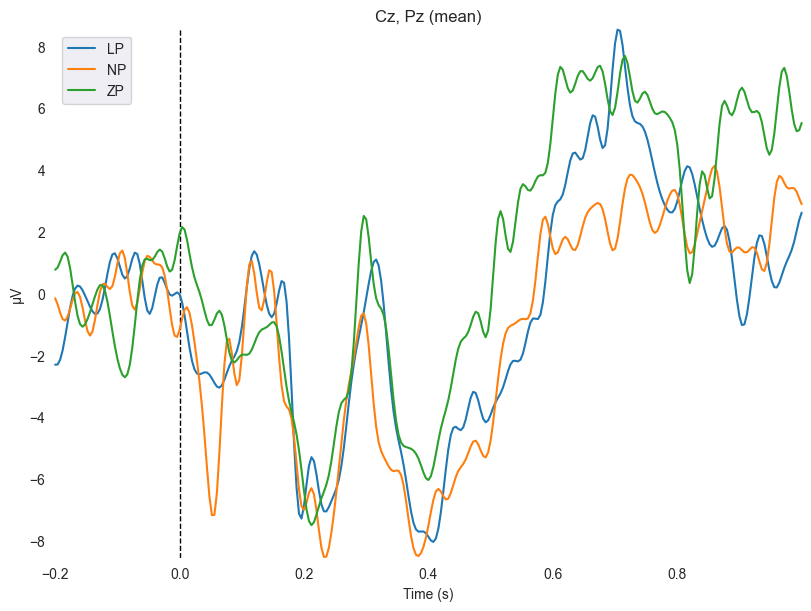

In [35]:
# Show data for Cz, Pz
mne.viz.plot_compare_evokeds(
    {"LP": epochs['lp'].average(),
     "NP": epochs['np'].average(),
     "ZP": epochs['zp'].average()},
    picks=['Cz', 'Pz'],
    combine='mean',
    show=True
)
plt.show()

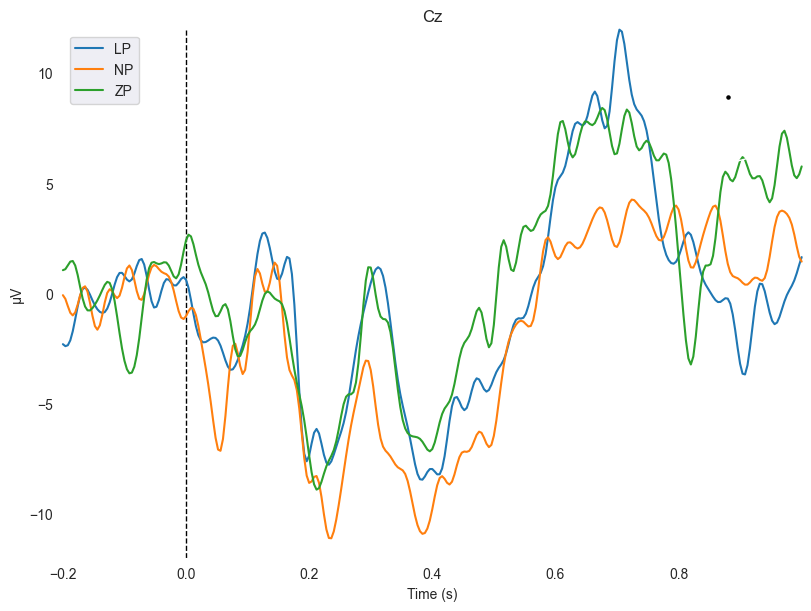

In [36]:
# Show data for Cz
mne.viz.plot_compare_evokeds(
    {"LP": epochs['lp'].average(),
     "NP": epochs['np'].average(),
     "ZP": epochs['zp'].average()},
    picks=['Cz'],
    show=True
)
plt.show()

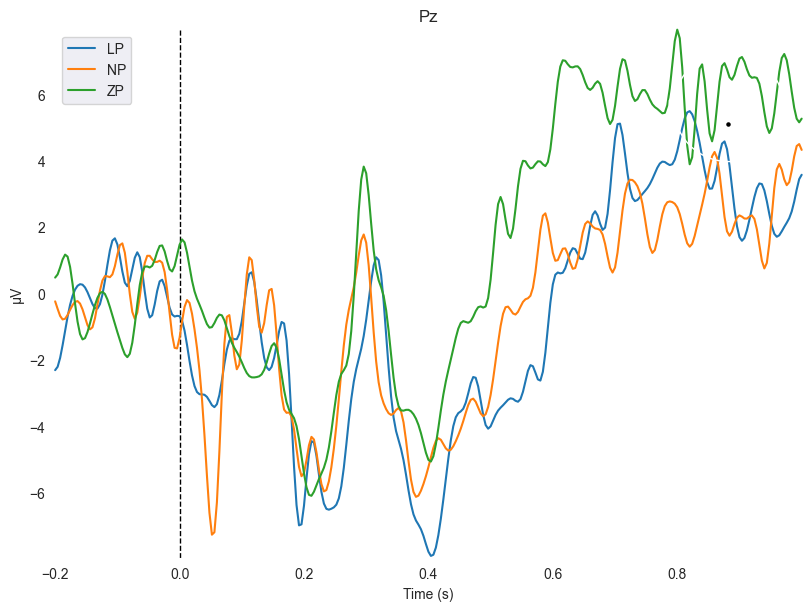

In [37]:
# Show data for Pz
mne.viz.plot_compare_evokeds(
    {"LP": epochs['lp'].average(),
     "NP": epochs['np'].average(),
     "ZP": epochs['zp'].average()},
    picks=['Pz'],
    show=True
)
plt.show()

In [38]:
# Now we can proceed to calculate mean ERPs amplitudes of LPP for the given subject in 400-600 ms time window
tmin, tmax = 0.4, 0.6
lp_amp = epochs['lp'].average().copy().crop(tmin, tmax).get_data().mean(axis=1)  # Across each channel
np_amp = epochs['np'].average().copy().crop(tmin, tmax).get_data().mean(axis=1)
zp_amp = epochs['zp'].average().copy().crop(tmin, tmax).get_data().mean(axis=1)
lp_amp, np_amp, zp_amp  # Channels: Cz, Pz

(array([-2.90290862e-06, -3.64084307e-06]),
 array([-4.31265525e-06, -2.02166819e-06]),
 array([-2.92318304e-07,  6.53202743e-07]))

In [39]:
# Instead of averaging across trials, we can assign mean amplitude per trial
cz_amps, pz_amps = np.array(
    [epochs[idx].copy().crop(tmin, tmax).get_data(picks=['Cz', 'Pz'])[0].mean(axis=1) for idx in range(len(epochs))]).T
# Assign computed Cz and Pz amplitudes to the csv_data dataframe
csv_data['Cz_LPP_400_600ms'] = cz_amps
csv_data['Pz_LPP_400_600ms'] = pz_amps
# Print means for each category and check that they are the same as before
print(csv_data.groupby('condition')[['Cz_LPP_400_600ms', 'Pz_LPP_400_600ms']].mean())
csv_data

           Cz_LPP_400_600ms  Pz_LPP_400_600ms
condition                                    
LP            -2.902909e-06     -3.640843e-06
NP            -4.312655e-06     -2.021668e-06
ZP            -2.923183e-07      6.532027e-07


,timestamp_iso,participant_id,age,response_group,trial_index,block,bundle_id,focal_product,tiein_product,condition,...,total_price,allocation_per_trial,response_key,response,rt_ms,valid_response,is_selected_bundle,bundles_bought_cumulative,Cz_LPP_400_600ms,Pz_LPP_400_600ms
0,2026-01-15T08:11:18.557,4,26,B,0,1,14,Sausage (780g),Mustard,NP,...,13.00,70.0,num_1,NOBUY,3567.17,1,0,0,-1.295141e-05,-1.100710e-05
1,2026-01-15T08:11:26.351,4,26,B,1,1,37,FAIRY Dishwashing Liquid Lemon 1.5L,Dishwashing Sponge VILEDA,ZP,...,11.04,70.0,num_1,NOBUY,2706.20,1,0,0,6.578370e-06,1.654428e-05
2,2026-01-15T08:11:34.093,4,26,B,2,1,3,Hoco J87 Tacker PD20W+QC3.0 Power Bank (10000m...,Hoco X86 Micro Spear silicone charging data ca...,ZP,...,46.40,70.0,num_3,BUY,1247.04,1,0,1,-1.132441e-05,-7.913456e-06
3,2026-01-15T08:11:41.571,4,26,B,3,1,11,Bacon,Eggs,NP,...,12.80,70.0,num_1,NOBUY,1694.41,1,0,1,-1.928234e-05,-1.451714e-05
4,2026-01-15T08:11:49.097,4,26,B,4,1,15,Nuts (Peanuts 120g),Dried Fruits,ZP,...,13.16,70.0,num_1,NOBUY,2241.42,1,0,1,-2.439946e-05,-1.934910e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2026-01-15T08:27:26.262,4,26,B,115,3,38,Table Lamp,Light Bulb,LP,...,55.30,70.0,num_3,BUY,2640.22,1,0,49,-1.219839e-05,-1.651750e-05
116,2026-01-15T08:27:33.772,4,26,B,116,3,15,Nuts (Peanuts 120g),Dried Fruits,LP,...,13.26,70.0,num_1,NOBUY,1124.55,1,0,49,-8.136085e-06,-2.045962e-05
117,2026-01-15T08:27:41.415,4,26,B,117,3,13,Cavear,Butter (President),LP,...,48.02,70.0,num_1,NOBUY,1380.46,1,0,49,-6.499082e-07,-1.257249e-06
118,2026-01-15T08:27:48.992,4,26,B,118,3,16,Chocolate Set (90g),Coffee,LP,...,17.50,70.0,num_3,BUY,824.77,1,0,50,-2.423774e-06,-2.625831e-06


In [40]:
# For all valid responses, for each condition, calculate: mean LPP amplitudes, response times, purchase rates, total spent
csv_data[csv_data['valid_response'] == 1].groupby('condition').agg(
    mean_Cz_LPP_400_600ms=('Cz_LPP_400_600ms', 'mean'),
    mean_Pz_LPP_400_600ms=('Pz_LPP_400_600ms', 'mean'),
    mean_response_time_ms=('rt_ms', 'mean'),
    total_spent=('total_price', 'sum'),
    mean_spent=('total_price', 'mean'),
    total_trials=('response', 'count'),
    total_bought=('response', lambda x: list(x).count('BUY')),
    purchase_rate=('response', lambda x: list(x).count('BUY') / len(x) * 100)
)

,mean_Cz_LPP_400_600ms,mean_Pz_LPP_400_600ms,mean_response_time_ms,total_spent,mean_spent,total_trials,total_bought,purchase_rate
condition,,,,,,,,
LP,-2.902909e-06,-3.640843e-06,1431.95100,1563.01,39.07525,40,14,35.0
NP,-4.312655e-06,-2.021668e-06,1594.42850,1559.01,38.97525,40,19,47.5
ZP,-2.923183e-07,6.532027e-07,1545.59975,1559.01,38.97525,40,17,42.5


In [41]:
# TODO:
# Utility that matches events & markers while reading xdf
# Preprocess data according to paper
# Analyze data (pingouin)
# Add visuals